In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=68c33126702fbd6eaa174757483400da40482dc8890c3f48e48f3d29ff75fdbc
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=1dd3e1431cf0d512efbbfd30cc57964c5eddd9474a9e2604dd30c0b88e6d01bc
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


Total number of rows in the original dataset: 27711
Total number of columns in the original dataset: 8
Number of columns dropped: 4
Number of missing values (NA, NULL, or empty strings) in numerical columns before imputation: 72

Total number of rows in the cleaned dataset after imputation: 27711
Number of rows where 'AppName' is empty, NULL, or NA: 0
Number of missing values (NA, NULL, or empty strings) in numerical columns after imputation: 0




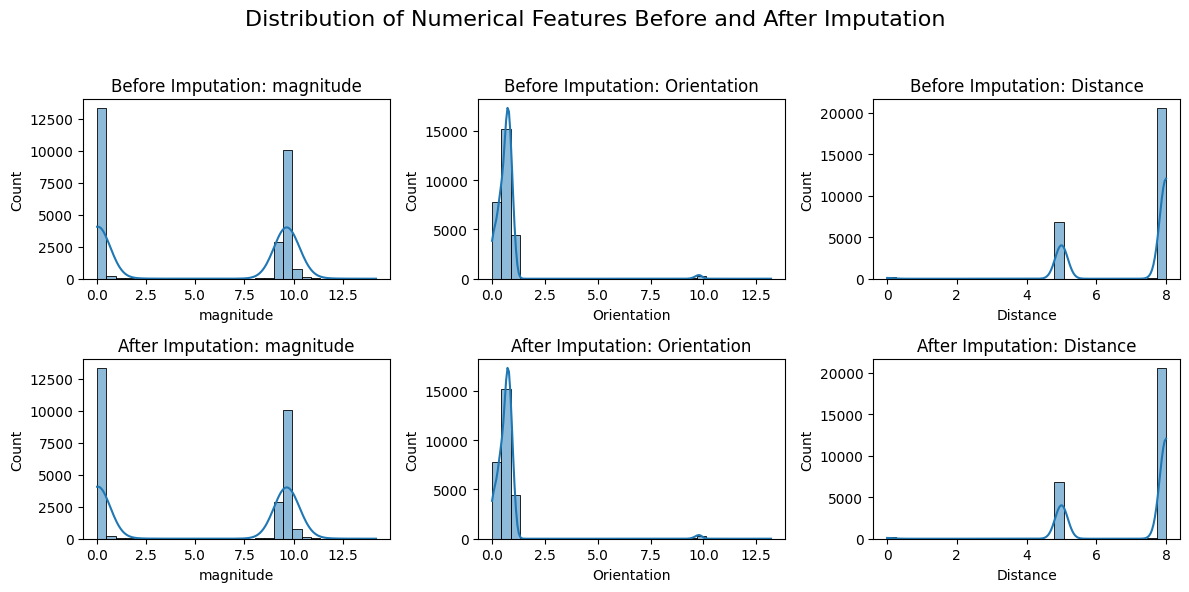

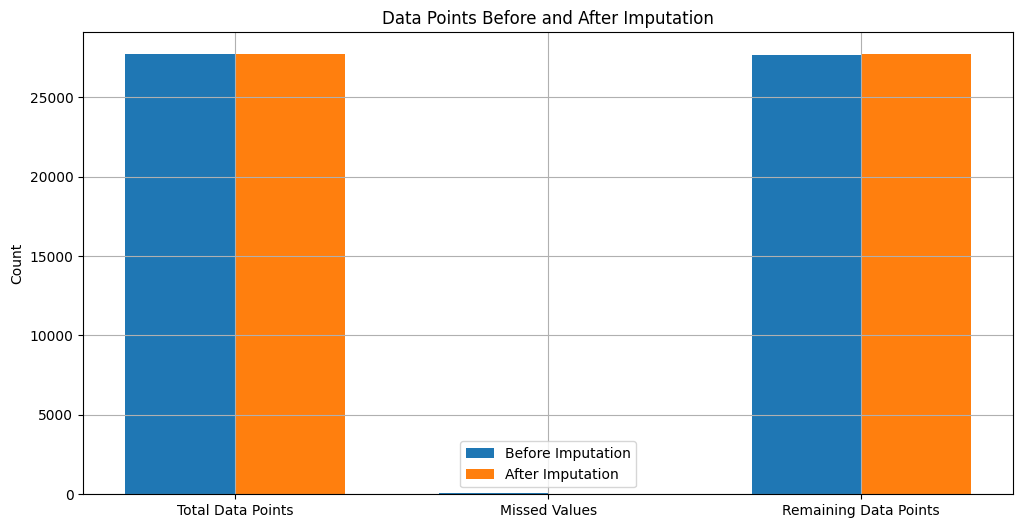


Number of rows in the training dataset: 22168
Number of rows in the testing dataset: 5543
Percentage of rows in the training dataset: 80.00%
Percentage of rows in the testing dataset: 20.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from fancyimpute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('DataFinal23.csv')

# Print the total number of rows and columns in the original dataset
total_rows_before, total_columns_before = df.shape
print(f"Total number of rows in the original dataset: {total_rows_before}")
print(f"Total number of columns in the original dataset: {total_columns_before}")

# Drop the 'CollectionFolder', 'Date', 'Time', and 'Document' columns
columns_to_drop = ['Folder', 'Date', 'Time', 'Document']
df = df.drop(columns=columns_to_drop, axis=1)

# Print the number of columns dropped
columns_dropped = len(columns_to_drop)
print(f"Number of columns dropped: {columns_dropped}")

# Drop rows where 'app' is empty, NULL, or NA
df = df.dropna(subset=['AppName'])
df = df[df['AppName'] != " "]  # Assuming you want to drop rows where 'app' is an empty string as well

# Count missing values in numerical columns
missing_values_before_numeric = df.select_dtypes(include=['number']).isnull().sum().sum()
print(f"Number of missing values (NA, NULL, or empty strings) in numerical columns before imputation: {missing_values_before_numeric}")

# Impute missing values in numerical columns using IterativeImputer from fancyimpute
imputer_numeric = IterativeImputer(max_iter=10, random_state=42)
df_imputed = pd.DataFrame(imputer_numeric.fit_transform(df.select_dtypes(include=['number'])), columns=df.select_dtypes(include=['number']).columns)
df[df_imputed.columns] = df_imputed

# Print the total number of rows in the cleaned dataset
total_rows_after = len(df)
print(f"\nTotal number of rows in the cleaned dataset after imputation: {total_rows_after}")

# Calculate the count of rows where 'app' is empty, NULL, or NA
rows_with_empty_app = total_rows_before - total_rows_after
print(f"Number of rows where 'AppName' is empty, NULL, or NA: {rows_with_empty_app}")

# Count missing values in numerical columns after imputation
missing_values_after_numeric = df.select_dtypes(include=['number']).isnull().sum().sum()
print(f"Number of missing values (NA, NULL, or empty strings) in numerical columns after imputation: {missing_values_after_numeric}")

print("\n")

# Plot histograms for numerical features before and after imputation
def plot_histograms(df_before, df_after):
    plt.figure(figsize=(12, 6))
    plt.suptitle('Distribution of Numerical Features Before and After Imputation', fontsize=16)

    # Plot histograms for each numerical column before imputation
    for i, column in enumerate(df_before.select_dtypes(include=['number']).columns, 1):
        plt.subplot(2, len(df_before.select_dtypes(include=['number']).columns), i)
        sns.histplot(df_before[column], bins=30, kde=True)
        plt.title(f'Before Imputation: {column}')

    # Plot histograms for each numerical column after imputation
    for i, column in enumerate(df_after.select_dtypes(include=['number']).columns, 1):
        plt.subplot(2, len(df_after.select_dtypes(include=['number']).columns), i + len(df_before.select_dtypes(include=['number']).columns))
        sns.histplot(df_after[column], bins=30, kde=True)
        plt.title(f'After Imputation: {column}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot histograms for numerical features before and after imputation
plot_histograms(df, df)

print("\n")

# Plot the total number of data points, missed values data points, and remaining data points before and after soft imputing
labels = ['Total Data Points', 'Missed Values', 'Remaining Data Points']
counts_before_imputation = [total_rows_before, missing_values_before_numeric, total_rows_before - missing_values_before_numeric]
counts_after_imputation = [total_rows_after, missing_values_after_numeric, total_rows_after - missing_values_after_numeric]

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = range(len(labels))

rects1 = ax.bar(x, counts_before_imputation, width, label='Before Imputation')
rects2 = ax.bar([i + width for i in x], counts_after_imputation, width, label='After Imputation')

ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Add labels, title, and grid
ax.set_ylabel('Count')
ax.set_title('Data Points Before and After Imputation')
ax.grid(True)

# Display the bar chart
plt.show()

# Check if 'app' is present in the columns
if 'AppName' in df.columns:
    # Specify the features (X) and the target variable (y)
    X = df.drop('AppName', axis=1)
    y = df['AppName']

    # Split the data into training and testing sets (80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the number of rows in the training dataset
    num_rows_train = len(X_train)
    print(f"\nNumber of rows in the training dataset: {num_rows_train}")

    # Print the number of rows in the testing dataset
    num_rows_test = len(X_test)
    print(f"Number of rows in the testing dataset: {num_rows_test}")

    # Calculate the percentage of rows in the training dataset
    percentage_rows_train = (num_rows_train / total_rows_after) * 100
    print(f"Percentage of rows in the training dataset: {percentage_rows_train:.2f}%")

    # Calculate the percentage of rows in the testing dataset
    percentage_rows_test = (num_rows_test / total_rows_after) * 100
    print(f"Percentage of rows in the testing dataset: {percentage_rows_test:.2f}%")

    # Optionally, you can save these splits to separate files
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    train_data.to_csv('training_data.csv', index=False)
    test_data.to_csv('test_data.csv', index=False)
else:
    print("Column 'AppName' not found in the dataset.")


In [ ]:
# Read a file already present in Colab
file_path = 'training_data.csv'

with open(file_path, 'r') as file:
    file_contents = file.read()

# Print the file contents
print(file_contents)


magnitude,Orientation,Distance,AppName
9.786204515533925,0.3905219751794067,8.0,GameAPP
9.451238338952685,0.9998077454020168,8.0,GameAPP
9.643683290171811,0.008234097,8.0,VideoAPP
9.820621667813278,0.7909245008845073,5.0,TextApp
9.453528538085893,0.1067956243486994,8.0,VideoAPP
9.438687133279412,0.7094170844876283,8.0,VideoAPP
0.001935755,0.4932656661696636,8.0,VideoAPP
0.024921299,0.6010662469256989,5.0,VideoAPP
0.00052363,0.9720184002682702,8.0,VideoAPP
9.810013495184055,9.810013495184055,8.0,VideoAPP
9.609990092101569,0.5345166037212971,8.0,VideoAPP
9.642313971,0.3928560586333647,8.0,VideoAPP
9.849683620233508,0.3390832436594065,8.0,GameAPP
0.000128567,0.1068004634806944,8.0,VideoAPP
9.35271309,0.3390814760054855,8.0,GameAPP
9.681683161316766,0.8808671482822363,8.0,VideoAPP
0.078893488,0.4080418999198881,8.0,GameAPP
0.007662615,0.7358574998105999,8.0,VideoAPP
0.000340313,0.4378260403791574,8.0,VideoAPP
0.043685619,0.4426862828980971,8.0,GameAPP
9.621236004283327,0.2658396568223723,8

In [ ]:
# Read a file already present in Colab
file_path = 'test_data.csv'

with open(file_path, 'r') as file:
    file_contents = file.read()

# Print the file contents
print(file_contents)

magnitude,Orientation,Distance,AppName
9.642466184498476,0.7092776004056399,8.0,VideoAPP
0.00134008,0.8020264359190489,5.0,TextApp
0.4024362218667168,0.4917964399338034,8.0,VideoAPP
0.012431299,0.4712973224034413,8.0,GameAPP
9.810013495184055,9.810013495184055,8.0,VideoAPP
0.015269353,0.9999427606038348,8.0,GameAPP
9.825185841122533,0.7054419983086022,8.0,GameAPP
9.669790638245397,0.4661137781996984,8.0,GameAPP
0.000441401,0.3743474884652739,8.0,VideoAPP
0.034779751,0.6010662469256989,5.0,VideoAPP
9.483627438637072,0.72767669,8.0,GameAPP
9.911741080705037,0.7209699283266451,8.0,VideoAPP
0.000287953,0.8604192293240005,8.0,GameAPP
9.456879429263823,0.3924699417216182,8.0,VideoAPP
9.787907210398256,0.6010662469256989,5.0,VideoAPP
9.498965614469707,0.4713610110381693,8.0,GameAPP
0.022379567,0.6879140445458316,5.0,VideoAPP
9.446188842,0.8586088144181604,8.0,VideoAPP
9.438918310648216,0.007985173,8.0,VideoAPP
9.72130312,0.7909245008845073,5.0,TextApp
0.000194282,0.007912224,8.0,VideoAPP
0.00

In [ ]:
import pandas as pd

# Load the testing dataset
testing_data = pd.read_csv('test_data.csv')

# Drop the 'app' column
testing_data_no_label = testing_data.drop('AppName', axis=1)

# Save the testing dataset without the 'app' column
testing_data_no_label.to_csv('testing_data_NoLabel.csv', index=False)

In [ ]:
import pandas as pd

# Load the testing dataset
testing_data = pd.read_csv('test_data.csv')

# Extract the 'AppName' column as labels
test_labels_actual = testing_data[['AppName']]

# Save the labels to 'Test_Labels_Actual.csv'
test_labels_actual.to_csv('Test_Labels_Actual.csv', index=False, header=False)

# Drop the 'AppName' column from the original dataset
testing_data_no_label = testing_data.drop('AppName', axis=1)

# Save the testing dataset without the 'AppName' column to 'testing_data_NoLabel.csv'
testing_data_no_label.to_csv('testing_data_NoLabel.csv', index=False)


In [ ]:
import pandas as pd

# Load the training data
df = pd.read_csv('training_data.csv')

# Ensure there are columns in the dataframe
if not df.empty:
    # Split the last column into a separate file (TrainingLabel.csv)
    last_column_name = df.columns[-1]
    training_label = df[[last_column_name]]
    training_label.to_csv('TrainingLabel.csv', index=False)

    # Save the rest of the columns (excluding the last column) into a separate file (TrainingDataSplit.csv)
    training_data_split = df.iloc[:, :-1]  # Exclude the last column
    training_data_split.to_csv('TrainingDataSplit.csv', index=False)

    print("Files saved successfully.")
else:
    print("No columns found in the dataset.")


Files saved successfully.


In [ ]:
import pandas as pd

# Read the CSV file with headers
input_file = 'TrainingDataSplit.csv'
df = pd.read_csv(input_file)

# Do some processing on the dataframe if needed

# Save the dataframe to a new CSV file without headers
output_file = 'Training_Data.csv'
df.to_csv(output_file, index=False, header=False)

In [ ]:
import pandas as pd

# Read the CSV file with headers
input_file = 'TrainingLabel.csv'
df = pd.read_csv(input_file)

# Do some processing on the dataframe if needed

# Save the dataframe to a new CSV file without headers
output_file = 'Training_Label.csv'
df.to_csv(output_file, index=False, header=False)

In [ ]:
import pandas as pd

# Read the CSV file with headers
input_file = 'testing_data_NoLabel.csv'
df = pd.read_csv(input_file)

# Do some processing on the dataframe if needed

# Save the dataframe to a new CSV file without headers
output_file = 'Test_Data.csv'
df.to_csv(output_file, index=False, header=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (Training):

[[ 4893     0     0]
 [    0  1514     0]
 [    0     0 15761]]

Training Accuracy: 100.00%


Accuracy Rate for RandomForestClassifier (Test): 91.94%


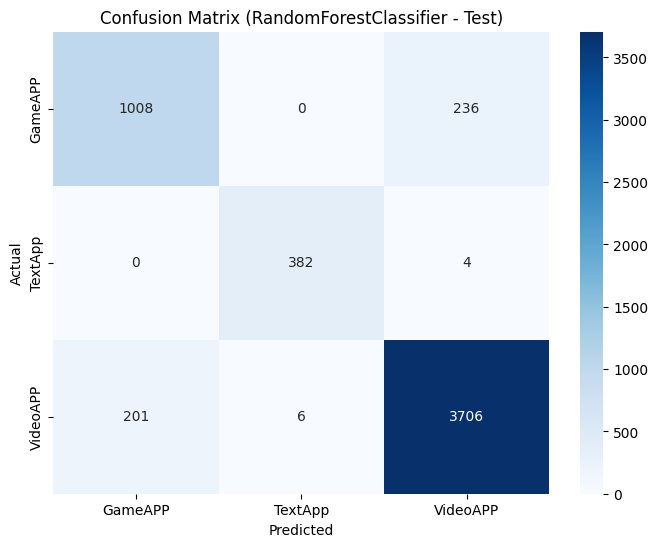


Comparison of Actual and Predicted Test Labels (RandomForestClassifier)
Actual,Predicted_RF
VideoAPP,VideoAPP
TextApp,TextApp
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,GameAPP
VideoAPP,VideoAPP
TextApp,TextApp
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextApp,TextApp
TextApp,TextApp
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,TextApp
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,TextApp
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(missing_values=1.00000000000000e+99, strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions = classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_train = confusion_matrix(train_labels, classifier.predict(train_data))
print("\n Confusion Matrix (Training):\n")
print(conf_matrix_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions = classifier.predict(train_data)
accuracy_train = accuracy_score(train_labels, train_predictions)
accuracy_percentage_train = accuracy_train * 100
print("\nTraining Accuracy:", f"{accuracy_percentage_train:.2f}%\n")

# Save the predictions to a CSV file
output_df = pd.DataFrame(predictions, columns=['Predictions'])
output_df.to_csv('TestLabelPrediction_RF.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the RandomForest model
predictions_rf = pd.read_csv('TestLabelPrediction_RF.csv')['Predictions']

# Compare predictions with actual test labels
comparison_rf = pd.DataFrame({'Actual': test_labels_actual, 'Predicted_RF': predictions_rf})

# Calculate accuracy for the RandomForest model
accuracy_rf = accuracy_score(test_labels_actual, predictions_rf)

# Print accuracy rate
print("\nAccuracy Rate for RandomForestClassifier (Test):", f"{accuracy_rf * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_rf = confusion_matrix(test_labels_actual, predictions_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual), yticklabels=np.unique(test_labels_actual))
plt.title('Confusion Matrix (RandomForestClassifier - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_rf.to_csv('Comparison_RF.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_RF.csv', 'r') as file:
    file_content = file.read()

print("\nComparison of Actual and Predicted Test Labels (RandomForestClassifier)")
print(file_content)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (Training):

[[ 4893     0     0]
 [    0  1514     0]
 [    0     0 15761]]

Training Accuracy: 100.00%


Accuracy Rate for DecisionTreeClassifier (Test): 91.11%


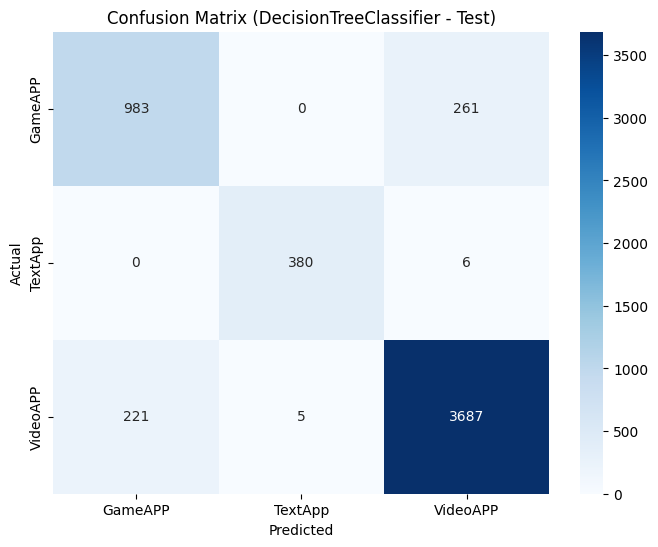


Comparison of Actual and Predicted Test Labels (DecisionTreeClassifier)
Actual,Predicted_DT
VideoAPP,VideoAPP
TextApp,TextApp
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,GameAPP
VideoAPP,VideoAPP
TextApp,TextApp
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextApp,TextApp
TextApp,TextApp
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,TextApp
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,TextApp
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,G

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(missing_values=1.00000000000000e+99, strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions = classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_train = confusion_matrix(train_labels, classifier.predict(train_data))
print("\n Confusion Matrix (Training):\n")
print(conf_matrix_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions = classifier.predict(train_data)
accuracy_train = accuracy_score(train_labels, train_predictions)
accuracy_percentage_train = accuracy_train * 100
print("\nTraining Accuracy:", f"{accuracy_percentage_train:.2f}%\n")

# Save the predictions to a CSV file
output_df = pd.DataFrame(predictions, columns=['Predictions'])
output_df.to_csv('TestLabelPrediction_DT.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the Decision Tree model
predictions_dt = pd.read_csv('TestLabelPrediction_DT.csv')['Predictions']

# Compare predictions with actual test labels
comparison_dt = pd.DataFrame({'Actual': test_labels_actual, 'Predicted_DT': predictions_dt})

# Calculate accuracy for the Decision Tree model
accuracy_dt = accuracy_score(test_labels_actual, predictions_dt)

# Print accuracy rate
print("\nAccuracy Rate for DecisionTreeClassifier (Test):", f"{accuracy_dt * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_dt = confusion_matrix(test_labels_actual, predictions_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual), yticklabels=np.unique(test_labels_actual))
plt.title('Confusion Matrix (DecisionTreeClassifier - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_dt.to_csv('Comparison_DT.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_DT.csv', 'r') as file:
    file_content = file.read()

print("\nComparison of Actual and Predicted Test Labels (DecisionTreeClassifier)")
print(file_content)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (SVM - Training):

[[  252     0  4641]
 [    0     0  1514]
 [   42     6 15713]]

Training Accuracy (SVM): 72.02%


Accuracy Rate for SVM (Test): 71.22%


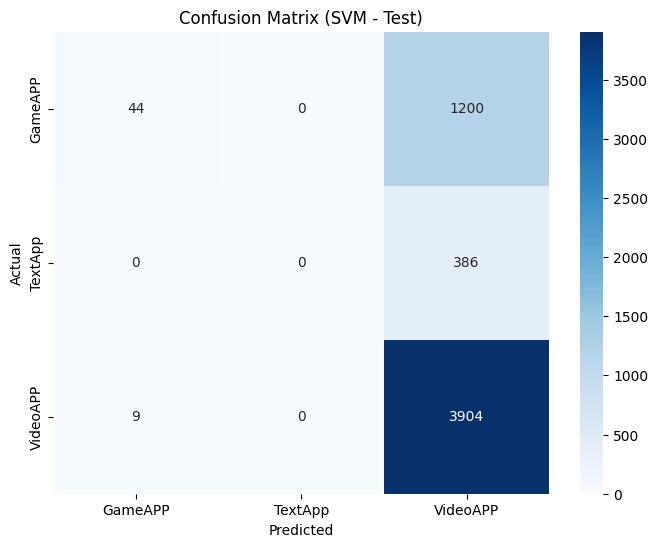


Comparison of Actual and Predicted Test Labels (SVM)
Actual,Predicted_SVM
VideoAPP,VideoAPP
TextApp,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
GameAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,VideoAPP
TextApp,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
TextApp,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
GameAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,VideoAPP
VideoAPP,V

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(missing_values=1.00000000000000e+99, strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the SVM classifier with radial kernel
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions_svm = svm_classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_svm_train = confusion_matrix(train_labels, svm_classifier.predict(train_data))
print("\n Confusion Matrix (SVM - Training):\n")
print(conf_matrix_svm_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions_svm = svm_classifier.predict(train_data)
accuracy_svm_train = accuracy_score(train_labels, train_predictions_svm)
accuracy_percentage_svm_train = accuracy_svm_train * 100
print("\nTraining Accuracy (SVM):", f"{accuracy_percentage_svm_train:.2f}%\n")

# Save the predictions to a CSV file
output_df_svm = pd.DataFrame(predictions_svm, columns=['Predictions'])
output_df_svm.to_csv('TestLabelPrediction_SVM.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual_svm = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the SVM model
predictions_svm = pd.read_csv('TestLabelPrediction_SVM.csv')['Predictions']

# Compare predictions with actual test labels
comparison_svm = pd.DataFrame({'Actual': test_labels_actual_svm, 'Predicted_SVM': predictions_svm})

# Calculate accuracy for the SVM model
accuracy_svm = accuracy_score(test_labels_actual_svm, predictions_svm)

# Print accuracy rate
print("\nAccuracy Rate for SVM (Test):", f"{accuracy_svm * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_svm = confusion_matrix(test_labels_actual_svm, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual_svm), yticklabels=np.unique(test_labels_actual_svm))
plt.title('Confusion Matrix (SVM - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_svm.to_csv('Comparison_SVM.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_SVM.csv', 'r') as file:
    file_content_svm = file.read()

print("\nComparison of Actual and Predicted Test Labels (SVM)")
print(file_content_svm)
